<a href="https://colab.research.google.com/github/hin1799/RS_Assignments/blob/main/RS_LA_02_Team_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Systems - Assignment 2

## Collaborative Filtering
**Submitted By:**
**Team 5**

**Team members:**

1. Dhara Shah (202211008)
2. Hinal Desai (202211035)
3. Naiya Patel (202211075)
4. Jay Joshi (202211079)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = '/content/drive/Shareddrives/LA-01/food recipes'

In [4]:
#reading the required csv files
interactions_train_df = pd.read_csv(dir+'/interactions_train.csv')
recipes_df = pd.read_csv(dir+'/RAW_recipes.csv')
pp_user = pd.read_csv(dir+'/PP_users.csv')

In [5]:
interactions_train_df

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [6]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [7]:
interactions_train_df['user_id'].nunique() #number of unique users

25076

In [8]:
pp_user

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


In [9]:
pp_user_copy = pp_user.loc[pp_user['n_items']>=100]
pp_user_copy.shape

(1165, 6)

In [10]:
filtered_user = pp_user_copy[['u', 'n_items']]
filtered_user

,u,n_items
3,3,1513
4,4,376
5,5,290
8,8,232
10,10,748
...,...,...
9097,9097,107
9133,9133,182
9341,9341,114
10869,10869,110


In [11]:
intcopy = interactions_train_df.copy()

In [12]:
filtered_user_df = pd.merge(intcopy, filtered_user, on='u', how='inner')

In [13]:
filtered_user_df

,user_id,recipe_id,date,rating,u,i,n_items
0,2312,780,2000-09-12,5.0,1674,127175,153
1,2312,51964,2000-09-26,5.0,1674,151793,153
2,2312,1232,2000-10-17,4.0,1674,15498,153
3,2312,4397,2000-10-17,5.0,1674,14380,153
4,2312,164,2000-10-20,5.0,1674,96573,153
...,...,...,...,...,...,...,...
410244,2001102678,246587,2018-01-13,5.0,4387,38446,114
410245,2001102678,519802,2018-01-13,5.0,4387,167653,114
410246,2001102678,53133,2018-02-14,5.0,4387,155102,114
410247,2001102678,204583,2018-03-17,5.0,4387,85525,114


In [14]:
filtered_user_df.i.nunique()

142485

In [15]:
filtered_user_df.i.value_counts()

99787     251
134610    192
139822    191
101819    190
37047     189
         ... 
20883       1
47694       1
30538       1
148465      1
130784      1
Name: i, Length: 142485, dtype: int64

In [16]:
filtered_item = filtered_user_df.groupby('i')['rating'].agg('count')
filtered_item = filtered_item.loc[filtered_item >= 20]
filtered_item

i
193       22
267       44
279       22
284       31
361       23
          ..
177496    24
177524    30
177548    21
177592    27
177884    39
Name: rating, Length: 1544, dtype: int64

In [17]:
filtered_item_df = pd.merge(filtered_user_df, filtered_item, on='i', how='inner')
filtered_item_df

,user_id,recipe_id,date,rating_x,u,i,n_items,rating_y
0,2312,2886,2001-04-18,5.0,1674,106975,153,60
1,9869,2886,2001-09-17,5.0,506,106975,1048,60
2,22655,2886,2009-02-07,3.0,1628,106975,129,60
3,25455,2886,2002-01-09,4.0,209,106975,223,60
4,25792,2886,2002-01-31,5.0,514,106975,336,60
...,...,...,...,...,...,...,...,...
54365,844554,304683,2012-02-20,5.0,263,107172,914,23
54366,860079,304683,2011-05-25,5.0,476,107172,541,23
54367,593927,304683,2011-06-02,5.0,357,107172,1363,23
54368,1701315,304683,2011-05-28,5.0,4589,107172,305,23


In [18]:
filtered_item_df.i.nunique()

1544

In [19]:
# pivot_df = filtered_item_df.pivot(index='u', columns='i', values='rating_x')
# pivot_df

Since the dataset is very large, it causes memory issues when trying to perform operations on it in one go. So the filtered_item_df dataset contains only those users who have given more than 100 ratings and only those items that have more than 20 reviews.

In [20]:
#using the toy dataset and keeping only the required columns
filtered_df = filtered_item_df[['user_id', 'recipe_id', 'rating_x']]

In [21]:
filtered_df = filtered_df.rename({'rating_x':'rating'}, axis=1)

In [22]:
filtered_df

,user_id,recipe_id,rating
0,2312,2886,5.0
1,9869,2886,5.0
2,22655,2886,3.0
3,25455,2886,4.0
4,25792,2886,5.0
...,...,...,...
54365,844554,304683,5.0
54366,860079,304683,5.0
54367,593927,304683,5.0
54368,1701315,304683,5.0


Since the dataset contains user id and recipe id which do not start from 0, it was causing issue in further operations, hence we have created a dictionary which contains the tuple of newly assigned user id/recipe id and the old value of user/recipe id.

In [23]:
#using dictionary to assign new user id and item id becuase we faced index out of bound error
new_user_id = dict(zip(list(filtered_df['user_id'].unique()), list(range(len(filtered_df['user_id'].unique())))))

In [24]:
#similarly for recipes
new_recipe_id = dict(zip(list(filtered_df['recipe_id'].unique()), list(range(len(filtered_df['recipe_id'].unique())))))

In [25]:
df = filtered_df.replace({'user_id': new_user_id, 'recipe_id': new_recipe_id})

In [26]:
df

,user_id,recipe_id,rating
0,0,0,5.0
1,1,0,5.0
2,2,0,3.0
3,3,0,4.0
4,4,0,5.0
...,...,...,...
54365,296,1543,5.0
54366,1152,1543,5.0
54367,1009,1543,5.0
54368,607,1543,5.0


So, df now contains user_id and recipe_id starting from 0.

Data Analysis

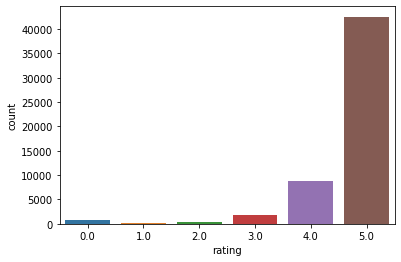

In [27]:
sb.countplot(data=df,x="rating")
plt.show()

This shows that almost 78% users have given 5 star rating while 16% users have given 4 star ratings. This shows that data is baised towards postive ratings.

## Train Test Split

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3)

In [ ]:
users = df.user_id.unique() #unique users after filtering
items = df.recipe_id.unique() #unique items after filtering

In [ ]:
users.shape

(1165,)

In [ ]:
items.shape

(1544,)

Our toy dataset contains 1165 users and 1544 unique items with 54370 ratings.

In [ ]:
#creating the train data matrix

train_mat = np.zeros((users.shape[0], items.shape[0]))

for i in train_data.itertuples():
    train_mat[i[1]-1, i[2]-1] = i[3]

In [ ]:
train_mat.shape

(1165, 1544)

In [ ]:
train_mat

array([[0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 4.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 5., 5., ..., 0., 0., 5.]])

In [ ]:
#creating the test data matrix

test_mat = np.zeros((users.shape[0], items.shape[0]))

for i in test_data.itertuples():
    test_mat[i[1]-1, i[2]-1] = i[3]

In [ ]:
test_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Cosine similarity

**Recommendation as a missing rating prediction problem**

In [ ]:
#user-user similarity
from sklearn.metrics.pairwise import cosine_similarity

user_user_sim = cosine_similarity(train_mat)

In [ ]:
user_user_sim

array([[1.        , 0.03431186, 0.01850187, ..., 0.        , 0.        ,
        0.04625468],
       [0.03431186, 1.        , 0.01978141, ..., 0.        , 0.        ,
        0.        ],
       [0.01850187, 0.01978141, 1.        , ..., 0.        , 0.        ,
        0.08      ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04625468, 0.        , 0.08      , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# for item item similarity transpose the matrix
item_item_sim = cosine_similarity(train_mat.T)

In [ ]:
item_item_sim

array([[1.        , 0.06588078, 0.1283825 , ..., 0.        , 0.        ,
        0.03918515],
       [0.06588078, 1.        , 0.16239245, ..., 0.        , 0.        ,
        0.04956572],
       [0.1283825 , 0.16239245, 1.        , ..., 0.07443246, 0.06821847,
        0.09658919],
       ...,
       [0.        , 0.        , 0.07443246, ..., 1.        , 0.11552712,
        0.09087365],
       [0.        , 0.        , 0.06821847, ..., 0.11552712, 1.        ,
        0.07495837],
       [0.03918515, 0.04956572, 0.09658919, ..., 0.09087365, 0.07495837,
        1.        ]])

##User-User Collaborative Filtering

In [ ]:
#predicting the ratings based on user-user similarity

user_pred = user_user_sim.dot(train_mat) / np.array([np.abs(user_user_sim).sum(axis=np.newaxis)]) #relative ratings based on user-user CF

In [ ]:
user_pred 

array([[1.49768126e-04, 1.30892309e-04, 1.29465921e-04, ...,
        7.31502266e-05, 1.03671895e-04, 4.54595713e-04],
       [9.69746123e-05, 8.08961503e-05, 4.52765042e-05, ...,
        2.44761739e-05, 4.71228428e-05, 1.73372075e-04],
       [1.20571904e-04, 9.09676722e-05, 1.05805021e-04, ...,
        5.14771579e-05, 4.71507883e-05, 4.13834935e-04],
       ...,
       [2.19009213e-05, 0.00000000e+00, 1.74332212e-05, ...,
        7.69971745e-05, 5.56274013e-05, 1.67155905e-05],
       [3.74692825e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.54476295e-05, 5.61783922e-05, 1.24143873e-05],
       [3.72991983e-04, 2.78286417e-04, 2.85668447e-04, ...,
        3.90240951e-05, 2.91699305e-05, 5.81481133e-04]])

In [ ]:
user_predictions_df = pd.DataFrame(user_pred, columns=list(items))
user_predictions_df.insert(0, 'user_id', list(users))

In [ ]:
user_predictions_df

,user_id,0,1,2,3,4,5,6,7,8,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543
0,0,0.000150,0.000131,0.000129,0.000114,0.000117,0.000680,0.000500,0.000167,0.000348,...,0.000062,0.000098,0.000066,0.000058,0.000066,0.000104,0.000098,0.000073,0.000104,0.000455
1,1,0.000097,0.000081,0.000045,0.000069,0.000074,0.000393,0.000289,0.000088,0.000369,...,0.000048,0.000048,0.000044,0.000049,0.000033,0.000069,0.000052,0.000024,0.000047,0.000173
2,2,0.000121,0.000091,0.000106,0.000089,0.000095,0.000375,0.000262,0.000070,0.000237,...,0.000034,0.000049,0.000045,0.000033,0.000043,0.000055,0.000049,0.000051,0.000047,0.000414
3,3,0.000145,0.000111,0.000110,0.000086,0.000081,0.000439,0.000352,0.000095,0.000253,...,0.000033,0.000070,0.000058,0.000048,0.000055,0.000069,0.000066,0.000047,0.000054,0.000451
4,4,0.000098,0.000085,0.000064,0.000060,0.000057,0.000380,0.000684,0.000067,0.000167,...,0.000015,0.000040,0.000070,0.000071,0.000029,0.000055,0.000054,0.000039,0.000049,0.000151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1160,0.000010,0.000006,0.000006,0.000025,0.000005,0.000028,0.000006,0.000000,0.000005,...,0.000010,0.000000,0.000000,0.000000,0.000000,0.000006,0.000032,0.000032,0.000000,0.000000
1161,1161,0.000014,0.000026,0.000003,0.000003,0.000009,0.000140,0.000097,0.000000,0.000022,...,0.000043,0.000036,0.000038,0.000024,0.000033,0.000015,0.000044,0.000024,0.000039,0.000023
1162,1162,0.000022,0.000000,0.000017,0.000000,0.000000,0.000052,0.000047,0.000017,0.000031,...,0.000055,0.000083,0.000008,0.000000,0.000020,0.000000,0.000068,0.000077,0.000056,0.000017
1163,1163,0.000037,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0.000000,0.000000,...,0.000041,0.000065,0.000012,0.000012,0.000015,0.000000,0.000019,0.000015,0.000056,0.000012


In [ ]:
#Evaluating predictions

from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(predicted, actual):
    predicted = predicted[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    
    return sqrt(mean_squared_error(predicted, actual))

In [ ]:
RMSE(user_pred, test_mat)

4.774126602525712

In [ ]:
def recommend_top_n_user_based(user_id, top_n=5):
  #dictionary reverse for old user ids
  for old, new in new_user_id.items():
    if user_id == new:
      print("Top ", top_n, " recipes for user_id: ", user_id)
      print("Actual user id: ", old)
  
  recipe_rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
  temp = user_predictions_df.loc[user_predictions_df['user_id'] == user_id].copy()
  temp.drop(user_predictions_df[recipe_rated], axis=1, inplace=True) #removing the recipes already rated by the user
  final = temp.iloc[:,1:].sort_values(by= temp.index[0], axis=1, ascending=False) #descending order of similarity
  top_recommend = final.iloc[:, :top_n].to_dict(orient='records') #extract the top n recommendations

  i=1
  recipes_lst = []
  for recipe_id in list(top_recommend[0].keys()):
    #reversing for recipe also
    for old, new in new_recipe_id.items():
      if recipe_id == new:
        name = recipes_df[recipes_df['id']==old]['name'].values[0]
        recipes_lst.append(name)
        i+=1

  print(recipes_lst)
  return top_recommend


In [ ]:
user_based_rec = recommend_top_n_user_based(0, 5)

Top  5  recipes for user_id:  0
Actual user id:  2312
['josephinas', 'chocolate  chocolate  chocolate  bundt cake with chocolate glaze', 'world s best chocolate chip cookies', 'artichoke and chicken bake', 'crock pot oniony pork chops with creamy mustard sauce']


The above recommendations are based on what users similar to our user have rated.

In [ ]:
#lets check which item this user had rated.
recipe1 = interactions_train_df[interactions_train_df['user_id'] == 2312]['recipe_id']
for i in recipe1:
  print(recipes_df[recipes_df['id'] == i]['name'])

111098    indian spiced chicken
Name: name, dtype: object
175976    roasted potatoes with tomatoes   rosemary
Name: name, dtype: object
222218    vegetarian pad thai
Name: name, dtype: object
156418    peanut dip
Name: name, dtype: object
44686    chicken liver pate ii
Name: name, dtype: object
164841    potato leek soup in bread bowls
Name: name, dtype: object
22168    best banana bread
Name: name, dtype: object
145871    nye s to die for meatballs
Name: name, dtype: object
158414    perfect pie crust  no fail
Name: name, dtype: object
24887    blackberry pie iii
Name: name, dtype: object
37306    casablanca chicken
Name: name, dtype: object
166680    pumpkin and pine nut lasagna
Name: name, dtype: object
93539    goat cheese   black olive mashed potatoes
Name: name, dtype: object
133606    memaw s collard greens
Name: name, dtype: object
87878    fried salmon patties
Name: name, dtype: object
99717    grilled salmon
Name: name, dtype: object
84742    flank steak with garlic wine sauc

## Item-Item Collaborative Filtering

In [ ]:
item_pred = train_mat.dot(item_item_sim) / np.array([np.abs(item_item_sim).sum(axis=1)])

In [ ]:
item_pred

array([[0.2877271 , 0.39024348, 0.333657  , ..., 0.20731735, 0.22137185,
        0.696043  ],
       [0.11206191, 0.1375792 , 0.09173463, ..., 0.05009193, 0.05875439,
        0.11886308],
       [0.10157303, 0.09897337, 0.09448097, ..., 0.05804521, 0.04471046,
        0.19581183],
       ...,
       [0.00547605, 0.        , 0.0081251 , ..., 0.04236863, 0.02808739,
        0.00853701],
       [0.01140039, 0.        , 0.        , ..., 0.00613358, 0.01906884,
        0.00340816],
       [0.13319781, 0.11199097, 0.09565183, ..., 0.02729846, 0.01976305,
        0.12531274]])

In [ ]:
item_pred_df = pd.DataFrame(item_pred, columns=list(items))
item_pred_df.insert(0, 'user_id', list(users))

In [ ]:
item_pred_df

,user_id,0,1,2,3,4,5,6,7,8,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543
0,0,0.287727,0.390243,0.333657,0.320902,0.397038,0.346970,0.348149,0.412581,0.375946,...,0.207328,0.212609,0.176130,0.199580,0.191279,0.350348,0.210430,0.207317,0.221372,0.696043
1,1,0.112062,0.137579,0.091735,0.107957,0.130950,0.110465,0.105081,0.141085,0.191920,...,0.085384,0.061226,0.067832,0.091841,0.056850,0.122869,0.068752,0.050092,0.058754,0.118863
2,2,0.101573,0.098973,0.094481,0.098926,0.104414,0.073409,0.071915,0.079386,0.097904,...,0.051152,0.042030,0.038099,0.047600,0.056274,0.076389,0.047611,0.058045,0.044710,0.195812
3,3,0.165632,0.180539,0.167118,0.141291,0.163646,0.138298,0.148967,0.149483,0.157146,...,0.063981,0.097470,0.100226,0.110572,0.114036,0.142008,0.086000,0.089756,0.068645,0.349886
4,4,0.095858,0.126387,0.081716,0.085400,0.111913,0.104873,0.220478,0.100731,0.094916,...,0.028015,0.051972,0.091121,0.112959,0.053092,0.100432,0.054022,0.046707,0.060528,0.117060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1160,0.003736,0.006300,0.004869,0.011752,0.006279,0.002547,0.002044,0.000000,0.002438,...,0.007494,0.000000,0.000000,0.000000,0.000000,0.006057,0.006167,0.008376,0.000000,0.000000
1161,1161,0.015103,0.031269,0.007132,0.005738,0.013392,0.028729,0.030359,0.000000,0.015356,...,0.043978,0.040120,0.052769,0.024298,0.044357,0.020663,0.043732,0.023001,0.043173,0.013652
1162,1162,0.005476,0.000000,0.008125,0.000000,0.000000,0.004836,0.006628,0.014697,0.007124,...,0.034157,0.039736,0.006730,0.000000,0.016784,0.000000,0.034061,0.042369,0.028087,0.008537
1163,1163,0.011400,0.000000,0.000000,0.000000,0.000000,0.002591,0.000000,0.000000,0.000000,...,0.013718,0.017042,0.005605,0.008093,0.009252,0.000000,0.005645,0.006134,0.019069,0.003408


In [ ]:
#Evaluating

RMSE(item_pred, test_mat)

4.56225747040631

In [ ]:
def recommend_top_n_item_based(user_id, top_n=5):
  #dictionary reverse for old user ids
  for old, new in new_user_id.items():
    if user_id == new:
      print("Top ", top_n, " recipes for user_id: ", user_id)
      print("Actual user id:", old)
  
  recipe_rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
  temp = item_pred_df.loc[item_pred_df['user_id'] == user_id].copy()
  temp.drop(item_pred_df[recipe_rated], axis=1, inplace=True) #removing the recipes already rated by the user
  final = temp.iloc[:,1:].sort_values(by= temp.index[0], axis=1, ascending=False) #descending order of similarity
  top_recommend = final.iloc[:, :top_n].to_dict(orient='records') #extract the top n recommendations

  i=1
  recipes_lst = []
  for recipe_id in list(top_recommend[0].keys()):
    #reversing for recipe also
    for old, new in new_recipe_id.items():
      if recipe_id == new:
        name = recipes_df[recipes_df['id']==old]['name'].values[0]
        recipes_lst.append(name)
        i+=1

  print(recipes_lst)
  return top_recommend


In [ ]:
item_based_rec = recommend_top_n_item_based(0, 5)

Top  5  recipes for user_id:  0
Actual user id: 2312
['no garlic garlic bread', 'buttermilk southern fried chicken', 'bread pudding in the microwave', 'ellinikos lemoni patatas   greek lemon potatoes', 'amish oven fried chicken']


The above items are recommended to user based on similar items to the item that he rated.

## Another approach - Adjusting the ratings

Here, we are mean centering the ratings to adjust them. This is done to minimize the difference between the hard raters and the easy raters.

In [ ]:
#centering the df to minimize difference between hard raters and easy raters
new_df = df.copy()

mean = new_df.groupby(['user_id'], as_index=False, sort=False).mean().rename(columns={'rating': 'rating_mean'})
new_df = new_df.merge(mean[['user_id', 'rating_mean']], how='left')
new_df.insert(2, 'adjusted_rating', new_df['rating'] - new_df['rating_mean'])

In [ ]:
new_df

,user_id,recipe_id,adjusted_rating,rating,rating_mean
0,0,0,0.125000,5.0,4.875000
1,1,0,0.085714,5.0,4.914286
2,2,0,-1.103448,3.0,4.103448
3,3,0,-0.472222,4.0,4.472222
4,4,0,0.042553,5.0,4.957447
...,...,...,...,...,...
54365,296,1543,0.134615,5.0,4.865385
54366,1152,1543,0.000000,5.0,5.000000
54367,1009,1543,0.369565,5.0,4.630435
54368,607,1543,0.089286,5.0,4.910714


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_df, test_size=0.3)

In [ ]:
users = new_df.user_id.unique()
items = new_df.recipe_id.unique()

In [ ]:
users.shape

(1165,)

In [ ]:
items.shape

(1544,)

In [ ]:
#creating the train data matrix

train_mat = np.zeros((users.shape[0], items.shape[0]))

for i in train_data.itertuples():
    train_mat[i[1]-1, i[2]-1] = i[3]

In [ ]:
#creating the test data matrix

test_mat = np.zeros((users.shape[0], items.shape[0]))

for i in test_data.itertuples():
    test_mat[i[1]-1, i[2]-1] = i[3]

In [ ]:
#user-user cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

user_user_sim = cosine_similarity(train_mat)

In [ ]:
# for item item similarity transpose the matrix
item_item_sim = cosine_similarity(train_mat.T)

In [ ]:
#Predicting the ratings
user_pred = user_user_sim.dot(train_mat) / np.array([np.abs(user_user_sim).sum(axis=np.newaxis)]) #relative ratings based on user-user CF

In [ ]:
user_predictions_df = pd.DataFrame(user_pred, columns=list(items))
user_predictions_df.insert(0, 'user_id', list(users))

In [ ]:
user_predictions_df

,user_id,0,1,2,3,4,5,6,7,8,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543
0,0,5.671692e-06,-2.625133e-06,2.345896e-06,-1.078080e-06,1.129654e-05,1.395529e-05,0.000027,4.768707e-07,-1.652896e-05,...,2.590687e-06,-5.371596e-07,1.559022e-06,-7.094431e-07,4.513182e-07,4.127483e-07,-2.594038e-07,1.919172e-06,1.589825e-06,0.000039
1,1,-1.086740e-06,5.223851e-07,5.866813e-07,6.939966e-08,2.952141e-06,-3.459603e-05,0.000004,-5.077494e-06,-2.200332e-04,...,8.082064e-07,2.291007e-06,-4.158259e-06,-3.325452e-06,1.700019e-06,-3.556844e-06,7.133086e-07,3.142381e-06,-3.184146e-06,-0.000188
2,2,-2.634096e-07,-2.317286e-06,1.708265e-05,2.542132e-06,3.126523e-06,-1.094794e-05,0.000014,6.362243e-07,-1.618028e-05,...,2.878677e-06,1.021482e-06,1.814776e-07,9.099925e-07,-5.196744e-07,-1.318592e-06,1.550254e-07,-1.252818e-06,-8.968856e-06,-0.000143
3,3,-8.943261e-07,-1.284914e-06,7.796112e-07,-8.420740e-07,2.280198e-07,-3.176626e-05,-0.000005,7.297146e-06,-1.824813e-05,...,-2.695619e-07,3.413784e-08,-5.566104e-08,4.019160e-06,5.023342e-08,2.709246e-07,-1.535024e-07,2.852712e-08,-4.715688e-07,0.000023
4,4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1160,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1161,1161,1.201548e-06,-8.079800e-07,-5.419678e-07,9.736614e-08,0.000000e+00,9.015207e-07,0.000004,0.000000e+00,1.198465e-06,...,-8.942796e-09,-1.296669e-07,1.412104e-06,2.058111e-06,-3.134199e-06,-1.165861e-07,2.070707e-07,9.405956e-08,9.912213e-07,-0.000004
1162,1162,2.985005e-07,0.000000e+00,2.300234e-07,0.000000e+00,0.000000e+00,-1.399392e-05,-0.000001,2.566984e-06,3.209058e-08,...,4.662812e-07,8.361200e-07,-1.503874e-06,1.872205e-06,3.724994e-07,0.000000e+00,1.762340e-07,-2.197658e-06,-1.475939e-06,0.000004
1163,1163,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [ ]:
#item-item predictions
item_pred = train_mat.dot(item_item_sim) / np.array([np.abs(item_item_sim).sum(axis=1)])

In [ ]:
item_predictions_df = pd.DataFrame(item_pred, columns=list(items))
item_predictions_df.insert(0,'user_id', list(users))

In [ ]:
item_predictions_df

,user_id,0,1,2,3,4,5,6,7,8,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543
0,0,0.001699,-0.002533,0.003147,-0.001101,0.005620,0.002704,0.006445,-0.001479,-0.000032,...,0.001458,-0.001511,0.000664,-0.002159,0.001094,-0.000137,-0.000231,0.010162,0.003258,0.004230
1,1,-0.002054,0.002600,0.004388,-0.006756,0.006703,-0.019461,0.003084,-0.005444,-0.148993,...,0.002794,0.017362,-0.018585,-0.009429,-0.002683,-0.006468,0.004781,0.027866,-0.014938,-0.167480
2,2,-0.001371,-0.004221,0.017204,0.000647,0.005126,-0.003285,0.001295,0.000686,-0.003674,...,0.010557,0.002827,0.000378,0.000622,0.000810,-0.002186,0.000644,-0.002511,-0.012737,-0.033913
3,3,-0.000241,-0.000370,0.000508,-0.000392,0.000048,-0.002000,-0.000562,0.000975,-0.001251,...,-0.000079,-0.000005,0.000160,0.000766,0.000128,0.000175,0.000006,0.000680,-0.000464,0.001162
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1161,1161,0.000879,-0.000053,-0.001113,0.000151,0.000000,0.000081,0.001358,0.000000,0.000149,...,0.000611,-0.000183,0.003315,0.001381,-0.002967,-0.000149,0.001233,0.002053,0.003848,-0.000469
1162,1162,0.000247,0.000000,0.000162,0.000000,0.000000,-0.001225,-0.000166,0.000607,0.000003,...,0.000322,0.002305,-0.003056,0.001699,0.000389,0.000000,0.000813,-0.001266,-0.002564,0.001142
1163,1163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
RMSE(user_pred, test_mat)

0.7836706032369665

In [ ]:
RMSE(item_pred, test_mat)

0.7835810543701359

In [ ]:
#Recommendations

user_adjusted_rec = recommend_top_n_user_based(0, 5)

Top  5  recipes for user_id:  0
Actual user id:  2312
['artichoke and chicken bake', 'zesty low fat chicken breasts', 'tasty tandoori  sweet potatoes', 'portabella pizzettas', 'sauteed zucchini']


In [ ]:
item_adjusted_rec = recommend_top_n_item_based(0, 5)

Top  5  recipes for user_id:  0
Actual user id: 2312
['no garlic garlic bread', 'buttermilk southern fried chicken', 'bread pudding in the microwave', 'ellinikos lemoni patatas   greek lemon potatoes', 'amish oven fried chicken']


This adjusted ratings approach had a lesser RMSE value when compared to the original approach without adjusted ratings.

# Matrix Factorization on very small dataset

In [ ]:
interactions_train_df

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [ ]:
pp_user = pd.read_csv('/content/drive/Shareddrives/LA-01/food recipes/PP_users.csv')
pp_user

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376
...,...,...,...,...,...,...
25071,25071,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[144172, 154054]",2,"[5.0, 5.0]",2
25072,25072,"[1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162436, 148228]",2,"[5.0, 5.0]",2
25073,25073,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[162681, 172034]",2,"[5.0, 5.0]",2
25074,25074,"[2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[157808, 159896]",2,"[5.0, 5.0]",2


In [ ]:
pp_user_copy = pp_user.loc[pp_user['n_items']>=500]
pp_user_copy

,u,techniques,items,n_items,ratings,n_ratings
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
10,10,"[196, 8, 3, 78, 190, 3, 3, 20, 3, 243, 24, 27,...","[50183, 55596, 168324, 165343, 147615, 98452, ...",748,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...",748
17,17,"[554, 10, 4, 183, 327, 3, 1, 92, 7, 525, 21, 3...","[135455, 8026, 119308, 139100, 62293, 101473, ...",1592,"[5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",1592
19,19,"[167, 10, 1, 74, 128, 0, 1, 16, 4, 195, 5, 15,...","[119019, 167743, 152998, 145979, 81377, 127080...",528,"[4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0, ...",528
20,20,"[236, 4, 1, 61, 100, 0, 0, 31, 3, 191, 15, 16,...","[48405, 19903, 109284, 157594, 169430, 137882,...",641,"[4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, ...",641
...,...,...,...,...,...,...
1751,1751,"[118, 11, 2, 63, 157, 0, 3, 19, 4, 174, 5, 21,...","[49740, 169138, 164372, 127080, 160062, 21290,...",564,"[3.0, 5.0, 4.0, 5.0, 5.0, 2.0, 4.0, 4.0, 5.0, ...",564
2147,2147,"[219, 10, 1, 130, 192, 2, 2, 21, 5, 258, 11, 1...","[14440, 24648, 82130, 149773, 163757, 69480, 8...",813,"[5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...",813
2324,2324,"[190, 6, 1, 89, 176, 0, 0, 18, 5, 196, 1, 17, ...","[60441, 99455, 16152, 49633, 155606, 149162, 1...",607,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",607
2399,2399,"[167, 5, 1, 79, 99, 1, 1, 18, 1, 156, 6, 17, 1...","[81066, 99949, 13796, 59299, 138676, 20670, 33...",557,"[5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 4.0, ...",557


In [ ]:
filtered_user = pp_user_copy[['u', 'n_items']]
filtered_user

,u,n_items
3,3,1513
10,10,748
17,17,1592
19,19,528
20,20,641
...,...,...
1751,1751,564
2147,2147,813
2324,2324,607
2399,2399,557


In [ ]:
interactions_train_df['user_id'].nunique()

25076

In [ ]:
intcopy = interactions_train_df.copy()

In [ ]:
filtered_user_df = pd.merge(intcopy, filtered_user, on='u', how='inner')

In [ ]:
filtered_user_df

,user_id,recipe_id,date,rating,u,i,n_items
0,8629,8694,2001-04-22,2.0,541,10633,687
1,8629,5315,2001-04-24,4.0,541,134662,687
2,8629,930,2001-07-28,4.0,541,54791,687
3,8629,10859,2001-08-15,2.0,541,30346,687
4,8629,21920,2002-03-12,4.0,541,129829,687
...,...,...,...,...,...,...,...
211785,1680722,483055,2017-08-19,5.0,2324,57563,607
211786,1680722,388551,2017-08-19,5.0,2324,9505,607
211787,1680722,42169,2018-02-08,5.0,2324,147615,607
211788,1680722,205885,2018-02-11,5.0,2324,170949,607


In [ ]:
filtered_user_df.i.nunique()

104029

In [ ]:
filtered_user_df.i.value_counts()

19297     49
99787     47
139822    46
147374    46
101819    44
          ..
84298      1
125621     1
142680     1
154588     1
9505       1
Name: i, Length: 104029, dtype: int64

In [ ]:
filtered_item = filtered_user_df.groupby('i')['rating'].agg('count')
filtered_item = filtered_item.loc[filtered_item >= 18]
filtered_item

i
284       25
648       23
946       21
1652      21
1984      33
          ..
172734    20
173270    23
176663    18
176716    20
177524    21
Name: rating, Length: 205, dtype: int64

In [ ]:
filtered_item_df = pd.merge(filtered_user_df, filtered_item, on='i', how='inner')
filtered_item_df

,user_id,recipe_id,date,rating_x,u,i,n_items,rating_y
0,8629,22782,2002-04-01,4.0,541,101819,687,44
1,27783,22782,2010-01-19,5.0,1709,101819,649,44
2,8688,22782,2003-05-08,5.0,235,101819,1218,44
3,37779,22782,2014-03-17,5.0,380,101819,918,44
4,47510,22782,2003-07-27,4.0,728,101819,793,44
...,...,...,...,...,...,...,...,...
4765,386585,272233,2009-11-23,5.0,85,60561,1203,18
4766,542159,272233,2009-10-13,5.0,175,60561,1354,18
4767,526666,272233,2009-11-30,5.0,727,60561,690,18
4768,1072593,272233,2009-07-10,5.0,736,60561,1790,18


In [ ]:
filtered_item_df.i.nunique()

205

In [ ]:
##using the toy dataset

filtered_item_df

,user_id,recipe_id,date,rating_x,u,i,n_items,rating_y
0,8629,22782,2002-04-01,4.0,541,101819,687,44
1,27783,22782,2010-01-19,5.0,1709,101819,649,44
2,8688,22782,2003-05-08,5.0,235,101819,1218,44
3,37779,22782,2014-03-17,5.0,380,101819,918,44
4,47510,22782,2003-07-27,4.0,728,101819,793,44
...,...,...,...,...,...,...,...,...
4765,386585,272233,2009-11-23,5.0,85,60561,1203,18
4766,542159,272233,2009-10-13,5.0,175,60561,1354,18
4767,526666,272233,2009-11-30,5.0,727,60561,690,18
4768,1072593,272233,2009-07-10,5.0,736,60561,1790,18


In [ ]:
## keeping only the required columns
filtered_df = filtered_item_df[['user_id', 'recipe_id', 'rating_x']]

In [ ]:
filtered_df = filtered_df.rename({'rating_x':'rating'}, axis=1)

In [ ]:
filtered_df

,user_id,recipe_id,rating
0,8629,22782,4.0
1,27783,22782,5.0
2,8688,22782,5.0
3,37779,22782,5.0
4,47510,22782,4.0
...,...,...,...
4765,386585,272233,5.0
4766,542159,272233,5.0
4767,526666,272233,5.0
4768,1072593,272233,5.0


In [ ]:
#using dictionary to assign new user id and item id becuase we faced index out of bound error
new_user_id = dict(zip(list(filtered_df['user_id'].unique()), list(range(len(filtered_df['user_id'].unique())))))

In [ ]:
# new_user_id #contains the dictionary of new assigned user ids

In [ ]:
#similarly for recipes
new_recipe_id = dict(zip(list(filtered_df['recipe_id'].unique()), list(range(len(filtered_df['recipe_id'].unique())))))

In [ ]:
df = filtered_df.replace({'user_id': new_user_id, 'recipe_id': new_recipe_id})

In [ ]:
df

,user_id,recipe_id,rating
0,0,0,4.0
1,1,0,5.0
2,2,0,5.0
3,3,0,5.0
4,4,0,4.0
...,...,...,...
4765,54,204,5.0
4766,112,204,5.0
4767,173,204,5.0
4768,95,204,5.0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3)

In [ ]:
users = df.user_id.unique()
items = df.recipe_id.unique()

In [ ]:
users.shape

(195,)

In [ ]:
items.shape

(205,)

In [ ]:
#creating the train data matrix

train_mat = np.zeros((users.shape[0], items.shape[0]))

for i in train_data.itertuples():
    train_mat[i[1]-1, i[2]-1] = i[3]

In [ ]:
test_mat = np.zeros((users.shape[0], items.shape[0]))

for i in test_data.itertuples():
  test_mat[i[1]-1, i[2]-1] = i[3]

###Matrix Factorization on user-item rating matrix

In [ ]:
import progressbar as pb
import numpy as np

def matrix_factorization(R, P, Q, K, steps=250, alpha=0.0002, beta=0.02):
  Q = Q.T
  for step in pb.progressbar(range(steps)):
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          eij = R[i][j] - np.dot(P[i,:], Q[:,j])
          for k in range(K):
            P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
            Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

    eR = np.dot(P, Q)
    e = 0
    for i in range(len(R)):
      for j in range(len(R[i])):
        if R[i][j] > 0:
          e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
          for k in range(K):
            e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))

    if e < 0.001:
      break
  return P, Q.T

In [ ]:
train_mat

array([[0., 0., 0., ..., 0., 0., 5.],
       [0., 0., 0., ..., 0., 0., 5.],
       [0., 4., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [5., 5., 5., ..., 0., 0., 0.]])

In [ ]:
N = len(train_mat)
M = len(train_mat[0])
K = 50

In [ ]:
P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [ ]:
nP, nQ = matrix_factorization(train_mat, P, Q, K)
new_ratings = np.dot(nP, nQ.T)

100% (250 of 250) |######################| Elapsed Time: 0:05:26 Time:  0:05:26


In [ ]:
new_ratings

array([[5.00437538, 5.50388309, 5.49003784, ..., 6.31516217, 6.19131556,
        4.72369037],
       [5.24968338, 5.62696495, 5.16947076, ..., 5.21556578, 5.7150601 ,
        5.23147394],
       [3.77691326, 4.65695711, 5.70301684, ..., 5.07007204, 4.760296  ,
        4.87351183],
       ...,
       [6.46145769, 6.68110684, 6.57474081, ..., 5.52278586, 5.97201809,
        5.59839119],
       [5.27671567, 5.6648245 , 6.3629421 , ..., 6.60334443, 6.11248127,
        6.35140652],
       [4.67617217, 4.73070432, 5.19067582, ..., 4.87015993, 5.12907898,
        4.4448569 ]])

In [ ]:
mf_predictions_df = pd.DataFrame(new_ratings, columns=list(items))
mf_predictions_df.insert(0, 'user_id', list(users))
mf_predictions_df

,user_id,0,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,0,5.004375,5.503883,5.490038,5.351245,5.116118,4.670125,4.977808,5.218554,6.162161,...,6.168873,4.085497,5.331057,4.636633,4.363943,4.747782,4.584636,6.315162,6.191316,4.723690
1,1,5.249683,5.626965,5.169471,4.553489,5.320187,5.744537,4.639782,4.480152,4.707586,...,5.844841,3.895089,5.139822,4.682994,4.357615,4.649077,4.564782,5.215566,5.715060,5.231474
2,2,3.776913,4.656957,5.703017,5.198232,4.855429,5.969997,4.999565,4.772692,4.376901,...,4.845065,4.304933,4.501984,4.896392,5.412283,4.671781,5.112719,5.070072,4.760296,4.873512
3,3,5.210081,4.469017,5.893797,4.927986,5.718925,4.258134,5.535026,5.844235,5.290559,...,5.196307,5.353909,4.640387,4.773491,3.599624,4.816598,4.880386,4.766149,4.138545,4.166649
4,4,5.037305,5.152712,4.677858,4.502045,5.007950,4.079945,5.118469,5.314216,4.640113,...,5.158730,4.316857,4.561814,4.309000,4.564053,4.593994,4.504879,4.429865,4.324233,3.808736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,5.576976,4.675785,6.709394,5.235399,5.108409,5.163562,4.775018,6.068029,4.738914,...,5.241206,3.892368,5.566783,4.648376,6.368072,5.414183,5.659308,5.255123,5.945962,5.407567
191,191,5.764860,3.758014,6.323325,5.263526,5.597776,5.544287,5.976607,6.433016,4.198783,...,5.824582,6.162211,5.548090,4.926973,5.807820,5.797939,5.941249,5.087081,5.668704,4.635095
192,192,6.461458,6.681107,6.574741,6.706239,7.027917,7.204683,6.828766,6.421540,6.989270,...,7.248120,6.755733,6.606673,5.202692,6.459263,7.420946,7.439077,5.522786,5.972018,5.598391
193,193,5.276716,5.664825,6.362942,7.413158,5.801945,5.985852,6.031937,6.726909,7.052640,...,5.802823,5.267144,5.463146,5.828154,6.202539,5.599144,6.279476,6.603344,6.112481,6.351407


In [ ]:
def recommend_top_n_matrix_factorization(user_id, top_n=5):
  #dictionary reverse for old user ids
  for old, new in new_user_id.items():
    if user_id == new:
      print("Top ", top_n, " recipes for user_id: ", user_id)
      print("Actual user id: ", old)
  
  recipe_rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
  temp = mf_predictions_df.loc[mf_predictions_df['user_id'] == user_id].copy()
  temp.drop(mf_predictions_df[recipe_rated], axis=1, inplace=True) #removing the recipes already rated by the user
  final = temp.iloc[:,1:].sort_values(by= temp.index[0], axis=1, ascending=False) #descending order of similarity
  top_recommend = final.iloc[:, :top_n].to_dict(orient='records') #extract the top n recommendations

  i=1
  recipes_lst = []
  for recipe_id in list(top_recommend[0].keys()):
    #reversing for recipe also
    for old, new in new_recipe_id.items():
      if recipe_id == new:
        name = recipes_df[recipes_df['id']==old]['name'].values[0]
        recipes_lst.append(name)
        i+=1

  print(recipes_lst)
  return top_recommend

In [ ]:
matrix_fact_rec = recommend_top_n_matrix_factorization(0, 5)

Top  5  recipes for user_id:  0
Actual user id:  8629
['roasted baby red potatoes', 'banana buttermilk muffins', 'zesty grilled pork chops', 'cinnamon mocha coffee from taste of home', 'chicken in balsamic barbecue sauce']


In [ ]:
RMSE(new_ratings, test_mat)

0.7619681858019025

The RMSE produced by Matrix Factorization method is lesser than that produced by the Memory-based method. But we have used a very small dataset to perform matrix factorization due to memory constraints.

# Conversational Recommendation System

The following code contains the conversational recommendation system using the collaborative filtering approach.

In [ ]:
# item-item similarity matrix
item_sim = pd.DataFrame(index = range(1, 1545), columns = range(1, 1545), data = item_item_sim)

In [ ]:
def conversational_RS():
  r = 0 # keeping track of rounds

  selectedItems = []  # for storing selected recipes in entire session
  userId = int(input('enter used id: '))
  rec = recommend_top_n_user_based(userId, 5) # single round
  recommendedItems = list(rec[0].keys()) # storing recommended recipes in entire session
  currentRecommendation = list(rec[0].keys()) # recipes recommended in current round

  # Conversational RS

  while True:

    r += 1
    selected = input('enter the item index or enter consumed: ').lower()

    if selected == 'consumed':
      selectedItems.append(currentRecommendation[int(input('enter index of consumed item: '))])
      break
    
    else:
      item_id = currentRecommendation[int(selected)]
      selectedItems.append(item_id)
      temp = item_sim[item_id].drop(recommendedItems).sort_values(ascending = False)
      currentRecommendation = temp[1:6].index
      recommendedItems.extend(currentRecommendation)

      recipesList = []
      for recipeId in currentRecommendation:
        #reversing for recipe also
        for old, new in new_recipe_id.items():
          if recipeId == new:
            name = recipes_df[recipes_df['id']==old]['name'].values[0]
            recipesList.append(name)
      print(recipesList)

  return userId, selectedItems, recommendedItems

In [ ]:
userId, selecetdItems, recommendedItems = conversational_RS()

enter used id: 2
Top  5  recipes for user_id:  2
Actual user id:  22655
['most incredible no fail pie crust', 'adam s ribs', 'roast beef horseradish spirals', 'bacon wrapped jalapeno poppers', 'fruit salad with pudding']
enter the item index or enter consumed: 1
['chinese beef with broccoli', 'brown sugar meatloaf', 'apple french toast casserole', 'allrighty then scrambled eggs   paula deen', 'bar  cheese']
enter the item index or enter consumed: 3
['beef patties in onion gravy', 'the best sweet and sour sauce', 'iced coffee mocha', 'roasted cauliflower   16 roasted cloves of garlic', 'italian sausage pie']
enter the item index or enter consumed: 2
['pork chops   southern style', 'tasty tandoori  sweet potatoes', 'kittencal s fluffiest scrambled eggs', 'oreo balls', 'korean pork strips']
enter the item index or enter consumed: consumed
enter index of consumed item: 1


In [ ]:
# evaluation measure for a session

sim_values = item_sim[selecetdItems[-1]][recommendedItems]
error = np.sqrt(np.mean(1 - sim_values) ** 2)

# References

- https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/
- https://medium.com/analytics-vidhya/matrix-factorization-as-a-recommender-system-727ee64683f0
- https://medium.com/web-mining-is688-spring-2021/a-recommendation-engine-for-the-recipes-by-using-collaborative-filtering-in-python-72171b52e7a2